In [1]:
!pip freeze > requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('punkt')
nltk.download('stopwords')
!pip install spacy
!python -m spacy download xx_ent_wiki_sm  # Model multibahasa untuk tokenisasi
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.svm import SVC

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 76.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sagitasantia/BPML/refs/heads/main/myPertamina.csv')
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4edb22d3-9b63-4d12-82fd-b7f2971fe1f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,4.6.6,2025-02-24 03:26:54,"Hai, Sobat Khaerul. Terimakasih telah mengguna...",2025-02-24 04:22:34,4.6.6
1,b8f5318a-6b80-4946-81bd-69a7e41d331f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,4.6.6,2025-02-24 02:50:32,"Hai, Sobat. Terimakasih telah menggunakan apli...",2025-02-24 04:26:32,4.6.6
2,c46f7175-209b-49a3-ac8b-d5c96c18502f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Memudahkan dalam bertransaksi,5,0,4.6.6,2025-02-24 02:00:12,"Hai, Sobat Rosit. Terimakasih telah menggunaka...",2025-02-24 04:28:53,4.6.6
3,b568d168-9b33-4d87-9329-1ffa5e5a872d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk tidak jelas komplain gak di respon jawaban...,1,2,4.6.6,2025-02-24 01:37:01,"Hai, Sobat Erwin. Mohon maaf atas ketidaknyama...",2025-02-15 08:59:55,4.6.6
4,1adf8be3-1f3a-447a-b958-4834e15f97ac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,berguna sekali disaat tidak membawa uang tunai...,5,0,4.6.6,2025-02-24 00:21:39,"Hai, Sobat Arther. Terimakasih telah menggunak...",2025-02-24 04:31:31,4.6.6


In [3]:
num_rows = data.shape[0]
num_cols = data.shape[1]

print(f"jumlah baris: {num_rows}")
print(f"jumlah kolom: {num_cols}")


jumlah baris: 20000
jumlah kolom: 11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               19999 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  16865 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          4589 non-null   object
 9   repliedAt             4589 non-null   object
 10  appVersion            16865 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


## **Preprocessing**

In [5]:
clean_df = data.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'replyContent', 'repliedAt', 'appVersion'], axis=1, errors='ignore')

In [6]:
clean_df.dropna()

,content,score,reviewCreatedVersion,at
0,ok,5,4.6.6,2025-02-24 03:26:54
1,Good,5,4.6.6,2025-02-24 02:50:32
2,Memudahkan dalam bertransaksi,5,4.6.6,2025-02-24 02:00:12
3,Apk tidak jelas komplain gak di respon jawaban...,1,4.6.6,2025-02-24 01:37:01
4,berguna sekali disaat tidak membawa uang tunai...,5,4.6.6,2025-02-24 00:21:39
...,...,...,...,...
19995,Mudah dan praktis,5,4.0.2,2023-08-27 00:53:53
19996,ok,5,4.0.2,2023-08-26 23:56:41
19997,anehh... !? kok maksa !!! yang kU punya hanya ...,2,4.0.2,2023-08-26 23:34:59
19998,Bagus,5,4.0.2,2023-08-26 23:13:20


In [7]:
clean_df = clean_df.drop_duplicates()

In [8]:
num_rows_cleaned = clean_df.shape[0]
num_cols_cleaned = clean_df.shape[1]

print(f"Jumlah baris setelah menghapus duplikat: {num_rows_cleaned}")
print(f"Jumlah kolom setelah menghapus duplikat: {num_cols_cleaned}")


Jumlah baris setelah menghapus duplikat: 20000
Jumlah kolom setelah menghapus duplikat: 4


In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               19999 non-null  object
 1   score                 20000 non-null  int64 
 2   reviewCreatedVersion  16865 non-null  object
 3   at                    20000 non-null  object
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


# **Text Preprocessing**

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text


In [11]:
def casefoldingText(text):
  text = text.lower()
  return text

In [12]:
def tokenizingText(text):
  text = word_tokenize(text)
  return text

In [13]:
def filteringText(text):
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
  filtered = []
  for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
  text = filtered
  return text

In [14]:
def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  stemmed_text = ' '.join(stemmed_words)
  return stemmed_text

In [15]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [16]:
slangwords = {
    "gk": "gak", "tp": "tapi", "yg": "yang", "krn": "karena",
    "dr": "dari", "klo": "kalau", "sm": "sama", "jd": "jadi",
    "blm": "belum", "sy": "saya", "trs": "terus", "udh": "sudah",
    "dg": "dengan", "dpt": "dapat", "bs": "bisa", "lbh": "lebih",
    "krn": "karena", "hrs": "harus", "tp": "tapi", "sm": "sama"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
# Memuat model bahasa spaCy
nlp = spacy.load('xx_ent_wiki_sm')  # Model bahasa multibahasa

# Fungsi tokenisasi dengan spaCy
def tokenizingText_spacy(text):
    doc = nlp(text)  # Proses teks menggunakan spaCy
    return [token.text for token in doc]  # Mengembalikan daftar token


In [18]:
print(clean_df['content'].apply(type).value_counts())

content
<class 'str'>      19999
<class 'float'>        1
Name: count, dtype: int64


In [19]:
clean_df['content'] = clean_df['content'].fillna('').astype(str)

In [20]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText_spacy)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)


In [21]:
def contains_emoji(text):
    if not isinstance(text, str):
        return False  # Pastikan hanya memproses string
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Filter dataframe dengan menghapus baris yang memiliki emoji di salah satu kolom
clean_df = clean_df[~clean_df.applymap(lambda x: contains_emoji(x)).any(axis=1)]


<ipython-input-21-93e275872cab>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_df = clean_df[~clean_df.applymap(lambda x: contains_emoji(x)).any(axis=1)]


In [22]:
clean_df

,content,score,reviewCreatedVersion,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,ok,5,4.6.6,2025-02-24 03:26:54,ok,ok,ok,[ok],[ok],ok
1,Good,5,4.6.6,2025-02-24 02:50:32,Good,good,good,[good],[good],good
2,Memudahkan dalam bertransaksi,5,4.6.6,2025-02-24 02:00:12,Memudahkan dalam bertransaksi,memudahkan dalam bertransaksi,memudahkan dalam bertransaksi,"[memudahkan, dalam, bertransaksi]","[memudahkan, bertransaksi]",memudahkan bertransaksi
3,Apk tidak jelas komplain gak di respon jawaban...,1,4.6.6,2025-02-24 01:37:01,Apk tidak jelas komplain gak di respon jawaban...,apk tidak jelas komplain gak di respon jawaban...,apk tidak jelas komplain gak di respon jawaban...,"[apk, tidak, jelas, komplain, gak, di, respon,...","[apk, komplain, respon, jawabannya, keterangan...",apk komplain respon jawabannya keterangan barc...
4,berguna sekali disaat tidak membawa uang tunai...,5,4.6.6,2025-02-24 00:21:39,berguna sekali disaat tidak membawa uang tunai...,berguna sekali disaat tidak membawa uang tunai...,berguna sekali disaat tidak membawa uang tunai...,"[berguna, sekali, disaat, tidak, membawa, uang...","[berguna, disaat, membawa, uang, tunai, ad, pr...",berguna disaat membawa uang tunai ad promo pem...
...,...,...,...,...,...,...,...,...,...,...
19995,Mudah dan praktis,5,4.0.2,2023-08-27 00:53:53,Mudah dan praktis,mudah dan praktis,mudah dan praktis,"[mudah, dan, praktis]","[mudah, praktis]",mudah praktis
19996,ok,5,4.0.2,2023-08-26 23:56:41,ok,ok,ok,[ok],[ok],ok
19997,anehh... !? kok maksa !!! yang kU punya hanya ...,2,4.0.2,2023-08-26 23:34:59,anehh kok maksa yang kU punya hanya OVO suru...,anehh kok maksa yang ku punya hanya ovo suru...,anehh kok maksa yang ku punya hanya ovo suruh ...,"[anehh, kok, maksa, yang, ku, punya, hanya, ov...","[anehh, maksa, ovo, suruh, link]",anehh maksa ovo suruh link
19998,Bagus,5,4.0.2,2023-08-26 23:13:20,Bagus,bagus,bagus,[bagus],[bagus],bagus


## **Pelabelan**

In [23]:
def label_by_score(score):
    if score >= 4:
        return 'Positif'
    elif score >= 3:
        return 'Netral'
    else:
        return 'Negatif'

clean_df['label'] = clean_df['score'].apply(label_by_score)

clean_df


,content,score,reviewCreatedVersion,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,label
0,ok,5,4.6.6,2025-02-24 03:26:54,ok,ok,ok,[ok],[ok],ok,Positif
1,Good,5,4.6.6,2025-02-24 02:50:32,Good,good,good,[good],[good],good,Positif
2,Memudahkan dalam bertransaksi,5,4.6.6,2025-02-24 02:00:12,Memudahkan dalam bertransaksi,memudahkan dalam bertransaksi,memudahkan dalam bertransaksi,"[memudahkan, dalam, bertransaksi]","[memudahkan, bertransaksi]",memudahkan bertransaksi,Positif
3,Apk tidak jelas komplain gak di respon jawaban...,1,4.6.6,2025-02-24 01:37:01,Apk tidak jelas komplain gak di respon jawaban...,apk tidak jelas komplain gak di respon jawaban...,apk tidak jelas komplain gak di respon jawaban...,"[apk, tidak, jelas, komplain, gak, di, respon,...","[apk, komplain, respon, jawabannya, keterangan...",apk komplain respon jawabannya keterangan barc...,Negatif
4,berguna sekali disaat tidak membawa uang tunai...,5,4.6.6,2025-02-24 00:21:39,berguna sekali disaat tidak membawa uang tunai...,berguna sekali disaat tidak membawa uang tunai...,berguna sekali disaat tidak membawa uang tunai...,"[berguna, sekali, disaat, tidak, membawa, uang...","[berguna, disaat, membawa, uang, tunai, ad, pr...",berguna disaat membawa uang tunai ad promo pem...,Positif
...,...,...,...,...,...,...,...,...,...,...,...
19995,Mudah dan praktis,5,4.0.2,2023-08-27 00:53:53,Mudah dan praktis,mudah dan praktis,mudah dan praktis,"[mudah, dan, praktis]","[mudah, praktis]",mudah praktis,Positif
19996,ok,5,4.0.2,2023-08-26 23:56:41,ok,ok,ok,[ok],[ok],ok,Positif
19997,anehh... !? kok maksa !!! yang kU punya hanya ...,2,4.0.2,2023-08-26 23:34:59,anehh kok maksa yang kU punya hanya OVO suru...,anehh kok maksa yang ku punya hanya ovo suru...,anehh kok maksa yang ku punya hanya ovo suruh ...,"[anehh, kok, maksa, yang, ku, punya, hanya, ov...","[anehh, maksa, ovo, suruh, link]",anehh maksa ovo suruh link,Negatif
19998,Bagus,5,4.0.2,2023-08-26 23:13:20,Bagus,bagus,bagus,[bagus],[bagus],bagus,Positif


In [24]:
label_counts = clean_df['label'].value_counts()

label_counts


,count
label,
Negatif,10030
Positif,8260
Netral,844


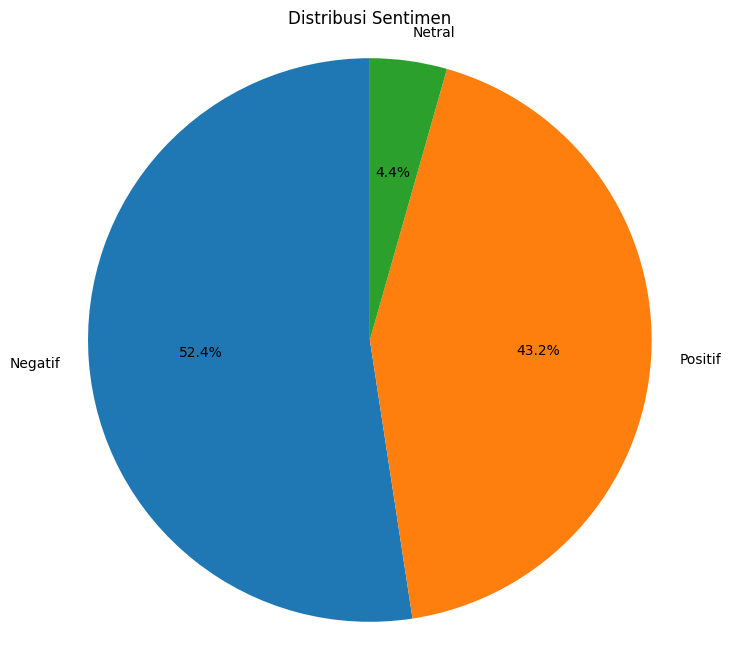

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Sentimen')
plt.axis('equal')
plt.show()


In [26]:
all_text = ' '.join(clean_df['text_akhir'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_text)


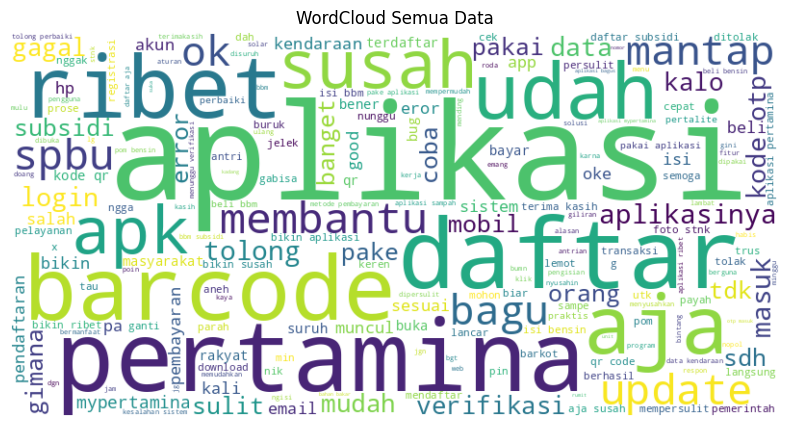

In [27]:
# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud Semua Data')
plt.show()

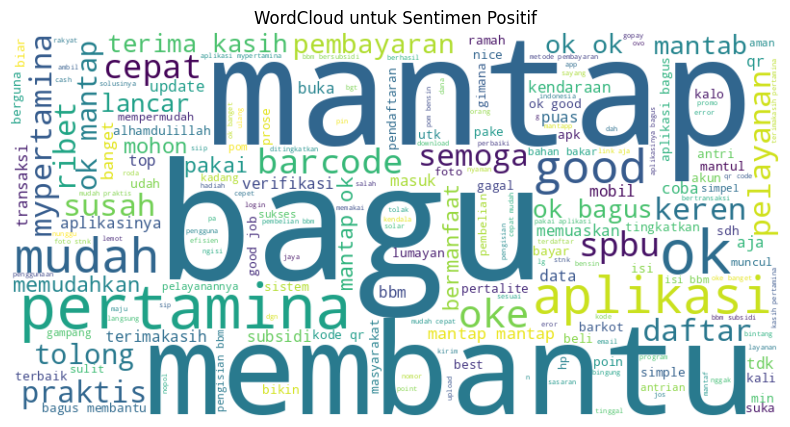

In [28]:
# WordCloud untuk Positive
positive_tweets = clean_df[clean_df['label'] == 'Positif']['text_akhir']
positive_text = ' '.join(positive_tweets)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud untuk Sentimen Positif')
plt.show()

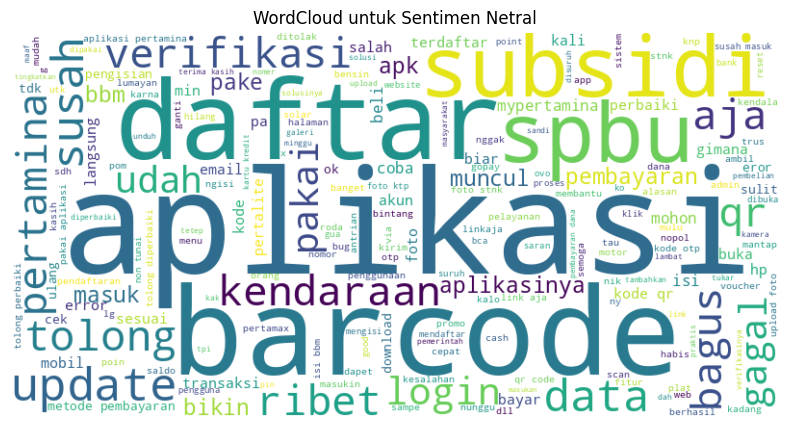

In [29]:
# Netral
neutral_tweets = clean_df[clean_df['label'] == 'Netral']['text_akhir']
neutral_text = ' '.join(neutral_tweets)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud untuk Sentimen Netral')
plt.show()


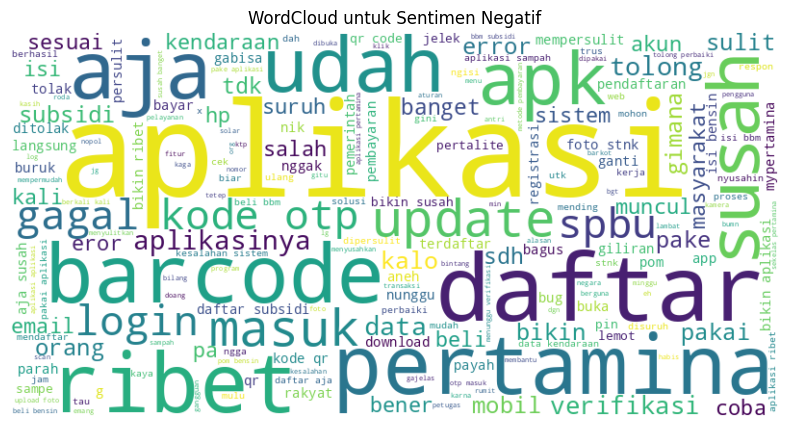

In [30]:
# WordCloud untuk Negative
negative_tweets = clean_df[clean_df['label'] == 'Negatif']['text_akhir']
negative_text = ' '.join(negative_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud untuk Sentimen Negatif')
plt.show()

## **Data Splitting dan Ekstraksi Fitur dengan TF-IDF**

In [31]:
X = clean_df['text_akhir']
y = clean_df['label']

In [32]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95)
X_tfidf = tfidf.fit_transform(X)

In [33]:
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

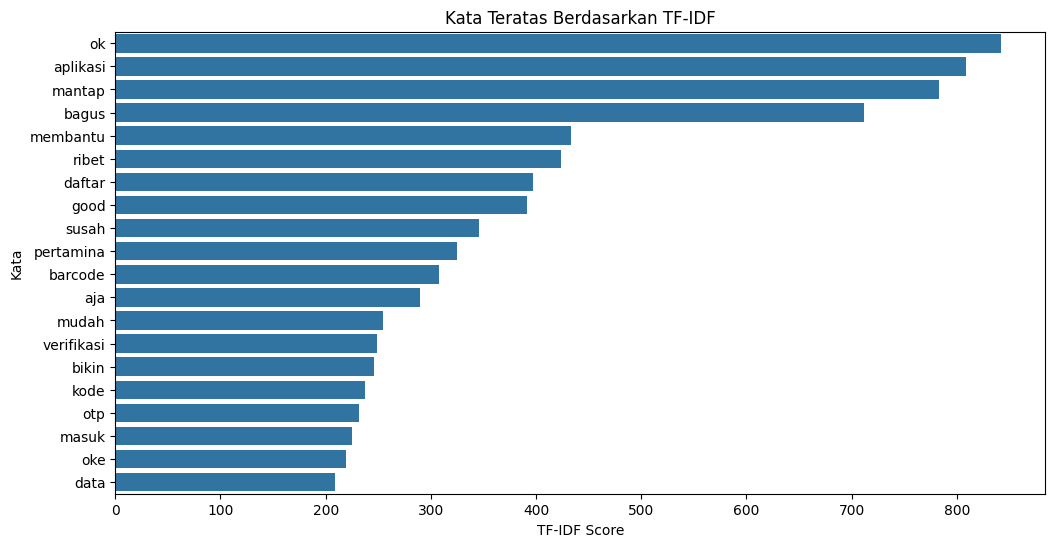

In [34]:
top_words = features_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Kata Teratas Berdasarkan TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Kata')
plt.show()


In [35]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **Modelling**

### **SVM TFIDF 80:20**

In [36]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print("SVM - Akurasi Training tfidf 80:20:", accuracy_train_svm)
print("SVM - Akurasi Testing tfidf 80:20:", accuracy_test_svm)

SVM - Akurasi Training tfidf 80:20: 0.8345380525091393
SVM - Akurasi Testing tfidf 80:20: 0.775008308408109


## **RF TFIDF 70:30**

In [37]:
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_tfidf, y)

In [38]:
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [39]:
random_forest = RandomForestClassifier()

In [40]:
random_forest.fit(X_train_70.toarray(), y_train_70)

RandomForestClassifier()

In [41]:
y_pred_train_rf = random_forest.predict(X_train_70.toarray())
y_pred_test_rf = random_forest.predict(X_test_70.toarray())

In [42]:
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train_70)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test_70)

In [43]:
print("Random Forest - Akurasi Training tfidf 70:30:", accuracy_train_rf)
print("Random Forest - Akurasi Testing tfidf 70:30:", accuracy_test_rf)

Random Forest - Akurasi Training tfidf 70:30: 0.9557043156245549
Random Forest - Akurasi Testing tfidf 70:30: 0.8531073446327684


## **rf Word2Vec 80 :20**

In [44]:
# Membuat model Word2Vec
model_w2v = Word2Vec(sentences=clean_df['text_tokenizingText'], vector_size=100, window=5, min_count=1, workers=4)

In [45]:
# Mengubah teks menjadi fitur Word2Vec
def word2vec_features(tokens):
    return [word for word in tokens if word in model_w2v.wv]

X_word2vec = clean_df['text_tokenizingText'].apply(word2vec_features)

def average_word2vec(tokens_list):
    valid_tokens = [model_w2v.wv[word] for word in tokens_list if word in model_w2v.wv]
    return np.mean(valid_tokens, axis=0) if valid_tokens else np.zeros(100)

X_word2vec = X_word2vec.apply(average_word2vec)

In [46]:
# Menyiapkan data untuk pelatihan dan pengujian
y = clean_df['label']  # Label sentimen
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec.tolist(), y, test_size=0.2, random_state=42)

In [47]:
# Training dengan RandomForest
rf_model_w2v = RandomForestClassifier()
rf_model_w2v.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier()

In [48]:
# Prediksi dan evaluasi
y_pred_train_rf_w2v = rf_model_w2v.predict(X_train_word2vec)
y_pred_test_rf_w2v = rf_model_w2v.predict(X_test_word2vec)

In [49]:
accuracy_train_rf_w2v = accuracy_score(y_pred_train_rf_w2v, y_train_word2vec)
accuracy_test_rf_w2v = accuracy_score(y_pred_test_rf_w2v, y_test_word2vec)

print("Akurasi Training word2vec:", accuracy_train_rf_w2v)
print("Akurasi Testing word2vec:", accuracy_test_rf_w2v)

Akurasi Training word2vec: 0.9902658914222251
Akurasi Testing word2vec: 0.8453096420172459


### **Inference**

In [50]:
text_uji = ["Pelayanannya sangat ramah dan cepat", "Aplikasi sering error", "Aplikasi sangat jelek"]

In [51]:
# Praproses teks uji
text_uji_clean = [cleaningText(text) for text in text_uji]
text_uji_casefolding = [casefoldingText(text) for text in text_uji_clean]
text_uji_slang = [fix_slangwords(text) for text in text_uji_casefolding]
text_uji_tokenizing = [tokenizingText_spacy(text) for text in text_uji_slang]
text_uji_stopword = [filteringText(text) for text in text_uji_tokenizing]
text_uji_akhir = [toSentence(text) for text in text_uji_stopword]

In [52]:
# Transformasi TF-IDF
text_uji_tfidf = tfidf.transform(text_uji_akhir)

# Prediksi dengan Random Forest
y_pred_uji_rf = random_forest.predict(text_uji_tfidf.toarray())
# Prediksi dengan SVM
y_pred_uji_svm = svm_model.predict(text_uji_tfidf)
# Prediksi dengan RandomForest Word2Vec
text_uji_word2vec = [word2vec_features(text) for text in text_uji_tokenizing]
text_uji_word2vec_avg = [average_word2vec(text) for text in text_uji_word2vec]
y_pred_uji_rf_w2v = rf_model_w2v.predict(text_uji_word2vec_avg)

In [53]:
print("Hasil prediksi Random Forest (TF-IDF):", y_pred_uji_rf)
print("Hasil prediksi SVM (TF-IDF):", y_pred_uji_svm)
print("Hasil prediksi Random Forest (Word2Vec):", y_pred_uji_rf_w2v)

Hasil prediksi Random Forest (TF-IDF): ['Positif' 'Negatif' 'Negatif']
Hasil prediksi SVM (TF-IDF): ['Positif' 'Negatif' 'Negatif']
Hasil prediksi Random Forest (Word2Vec): ['Positif' 'Negatif' 'Positif']


## **Kesimpulan**

### **3. Kesimpulan dan Analisis**:
1. **Model Random Forest (TF-IDF 70:30)** memberikan hasil yang paling **baik** dalam hal akurasi testing, yaitu **85.3%**, menunjukkan kemampuan model ini untuk mengklasifikasikan sentimen secara lebih akurat pada data yang tidak terlihat.

2. **SVM** memiliki akurasi **lebih rendah**, baik pada training (83.45%) maupun testing (77.50%). Ini menunjukkan bahwa SVM cenderung **kurang efektif** dalam mengklasifikasikan sentimen dibandingkan dengan Random Forest, mungkin karena **keberagaman data** yang cukup tinggi dan karakteristik **non-linear** dalam data teks.

3. **Random Forest (Word2Vec)** memiliki akurasi pelatihan yang sangat tinggi (99%), namun sedikit menurun pada data testing (84.53%). Hal ini menunjukkan **overfitting** pada model, di mana model sangat terlatih pada data pelatihan, tetapi tidak mampu menggeneralisasi dengan baik pada data yang baru.
